# Analyza Kratochvilova

Abych si usetril praci, tak vyuzivam prikazy ze:
* analyzy vetru - https://github.com/martin-majlis/ms-opendata-tools/blob/master/01-Analyza-Vetru.ipynb
* analyza skola Opavska - https://github.com/martin-majlis/ms-opendata-tools/blob/master/02-Opavska.ipynb
* simulace skoly - https://github.com/martin-majlis/ms-opendata-simulation/blob/master/Analysis.ipynb

In [1]:
# import balicku
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# nactu predpripravena data
data_raw = pd.read_csv('kratochvilova_sensor.csv')

In [3]:
# podivam se, jake sloupce jsou dostupne
data_raw.columns

Index(['TS', 'TS_H', '0004A30B001EC90C-Battery', '0004A30B001EC90C-Channel',
       '0004A30B001EC90C-Events_counter', '0004A30B001EC90C-LrrRSSI',
       '0004A30B001EC90C-LrrSNR', '0004A30B001EC90C-Magnet_status',
       '0004A30B001EC90C-Packet_type', '0004A30B001EC90C-RSSI',
       '0004A30B001EC90C-SNR', '0004A30B001EC90C-SpFact',
       '0004A30B001EC90C-SubBand', '0004A30B001EC90C-Timestamp',
       '0004A30B001EE17B-Battery', '0004A30B001EE17B-Channel',
       '0004A30B001EE17B-Illuminance', '0004A30B001EE17B-LrrRSSI',
       '0004A30B001EE17B-LrrSNR', '0004A30B001EE17B-Packet_type',
       '0004A30B001EE17B-RSSI', '0004A30B001EE17B-SNR',
       '0004A30B001EE17B-SpFact', '0004A30B001EE17B-SubBand',
       '0004A30B001EE17B-Timestamp', '0004A30B001EE4E6-Battery',
       '0004A30B001EE4E6-Channel', '0004A30B001EE4E6-Events_counter',
       '0004A30B001EE4E6-LrrRSSI', '0004A30B001EE4E6-LrrSNR',
       '0004A30B001EE4E6-Magnet_status', '0004A30B001EE4E6-Packet_type',
       '0004A3

In [4]:
# Ted si vyberu sloupecky, ktere vypadaji uzitecne
COLUMNS_KRATOCHVILOVA = [
    #'TS', 
    'TS_H',
    '0004A30B001EC90C-Events_counter',
    '0004A30B001EC90C-Magnet_status',
    '0004A30B001EE17B-Illuminance',
    '0004A30B001EE4E6-Events_counter',
    '0004A30B001EE4E6-Magnet_status',
    '0004A30B001EE750-Soil_Moisture',
    '0004A30B001F56D7-Illuminance',
    '0004A30B001F56DE-Humidity',
    '0004A30B001F56DE-Temperature',
    '0004A30B001F712A-Noise',
    '0004A30B001F856E-Wind_Direction', 
    '0004A30B001F856E-Wind_Speed',
]
data_kratochvilova = data_raw[COLUMNS_KRATOCHVILOVA]
data_kratochvilova.describe()

,0004A30B001EC90C-Events_counter,0004A30B001EC90C-Magnet_status,0004A30B001EE17B-Illuminance,0004A30B001EE4E6-Events_counter,0004A30B001EE4E6-Magnet_status,0004A30B001EE750-Soil_Moisture,0004A30B001F56D7-Illuminance,0004A30B001F56DE-Humidity,0004A30B001F56DE-Temperature,0004A30B001F712A-Noise,0004A30B001F856E-Wind_Direction,0004A30B001F856E-Wind_Speed
count,341.000000,341.000000,1636.000000,350.000000,350.000000,3.000000,1671.000000,1680.000000,1680.000000,297.000000,599.000000,599.000000
mean,2.627566,0.199413,76.007885,4.414286,0.288571,0.001333,92.222621,23.298109,12.748691,33.160000,192.771285,16.342137
std,2.864438,0.400147,160.054917,6.409370,0.453747,0.000577,266.983302,18.375245,10.139983,10.435805,89.268086,80.183676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,1.946000,1.883000,30.000000,0.000000,1.440000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.001000,0.000000,4.267000,2.228000,30.000000,135.000000,1.440000
50%,2.000000,0.000000,0.000000,2.000000,0.000000,0.001000,0.000000,39.460000,22.350000,30.000000,180.000000,1.440000
75%,3.000000,0.000000,77.125000,5.000000,1.000000,0.001500,33.800000,40.760000,22.500000,30.000000,270.000000,1.440000
max,16.000000,1.000000,1026.900000,39.000000,1.000000,0.002000,1787.000000,47.470000,22.880000,94.640000,337.500000,646.080000


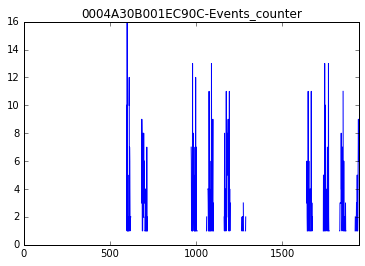

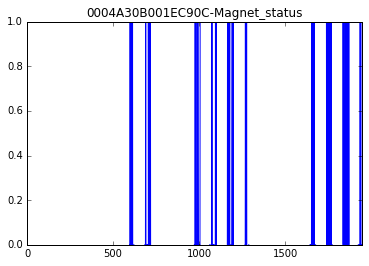

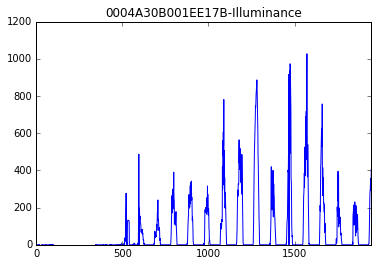

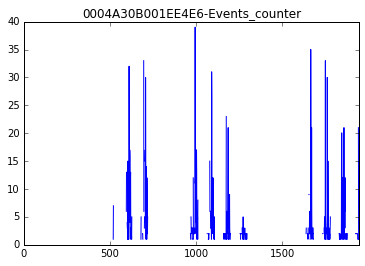

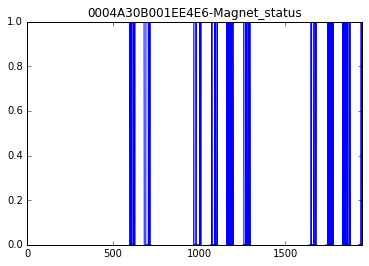

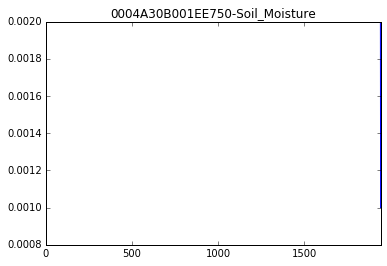

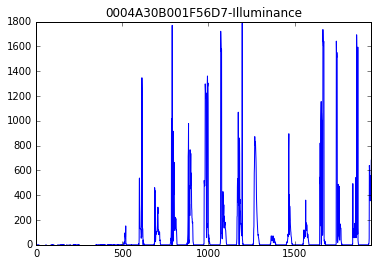

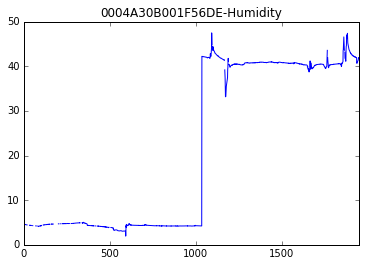

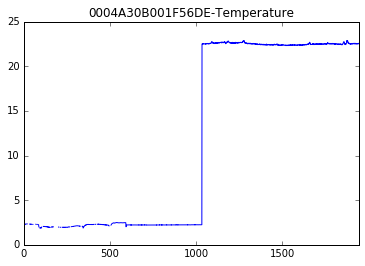

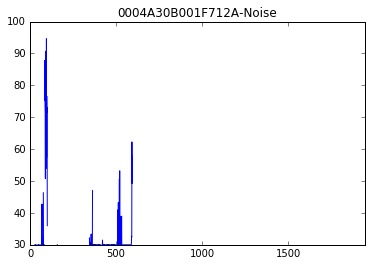

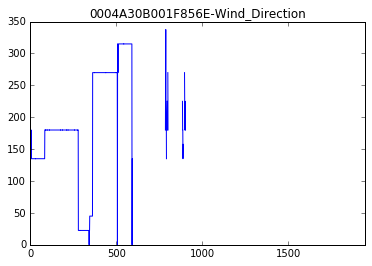

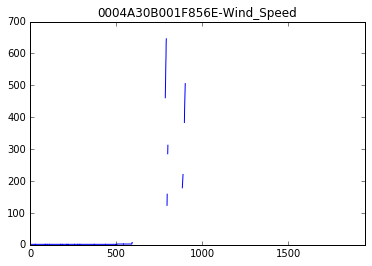

In [5]:
# Nebo muzu udelat smycku pro vsechny sloupecky
for col in COLUMNS_KRATOCHVILOVA:
    if col in ['TS', 'TS_H']:
        continue
    data_kratochvilova[col].plot(title=col)
    plt.show()